In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 线性回归
## 模拟数据生成

In [159]:
def gen_sample_data(size: int=100):
    w = random.randint(2, 10) + random.random()
    b = random.randint(0, 5) + random.random()
    print('w:{}, b:{}'.format(w, b))
    
    def map_fun(x):
        # 计算出准确值之后加入噪声
        return w * x + b + random.randint(-10, 100)
    
    x = np.random.randint(0, 100, 100)
    y = np.vectorize(map_fun)(x)
    return x, y

w:2.4590829858227576, b:0.04563517835523645


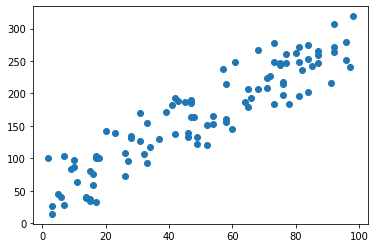

In [168]:
x_list, y_list = gen_sample_data()
plt.scatter(x_list, y_list)
plt.show()

## 1. 模型假设: y = w*x + b
## 2. 期望函数/损失函数/目标函数 loss = 0.5((y_label - (w*x + b)) ^ 2
    乘以0.5是为了在对loss求导的时候，约掉
## 3. 梯度函数

## 模型函数

In [147]:
def inference(w, b, x):
    return w * x + b

##  损失函数

In [148]:
def loss_function(w, b, x_list: np.ndarray, ground_truth_list: np.ndarray):
    '''
    ground_truth_list: 标签
    '''    
    avg_loss = 0
    
    def infer(x):
        return inference(w, b, x)
        
    pre_y = np.vectorize(infer)(x_list)
    total_loss = 0.5*(pre_y - ground_truth_list)**2
    return total_loss.mean()
loss_function(3, 4, x_list, y_list)

4885.619016490078

## 梯度计算

In [149]:
def gradient(x, gt_y, pred_y):
    diff = gt_y - pred_y
    diff_w = diff * x  # loss函数对w求导
    diff_b = diff  # loss函数对b求导
    return diff_w, diff_b

### batch size个数据样本带来的梯度

In [150]:
def cal_step_gradient(x_list, gt_y_list, w, b, lr):
    pre_y_list = np.vectorize(inference)(w, b, x_list)
    dw_total, db_total = np.vectorize(gradient)(x_list, gt_y_list, pre_y_list)
    return w + dw_total.mean() * lr, b + db_total.mean() * lr

In [208]:
def train(x_list: np.ndarray, gt_y_list: np.ndarray, batch_size, lr=0.001, max_iterations=100):
    '''
    x_list: 
    gt_y_list:
    batch_size:
    lr: 学习率 learning rate
    max_iterations: 最大迭代次数
    '''
    w, b = 0, 0
    size = x_list.size
    draw_step = max_iterations // 10
    for i in range(max_iterations):
        batch_ids = np.random.choice(size, batch_size)
        batch_x = x_list[batch_ids]
        batch_y = gt_y_list[batch_ids]
        w, b = cal_step_gradient(batch_x, batch_y, w, b, lr)
        loss = loss_function(w, b, batch_x, batch_y)
        print('w: {}, b:{}, loss:{}'.format(w, b, loss))
        if i % draw_step == 0:
            # draw the line
            plt.scatter(x_list, gt_y_list)
            x_dot = np.linspace(0, 100, 50)
            y_dot = w * x_dot + b
            label = 'iteration:{}'.format(i + 1)
            plt.plot(x_dot, y_dot, color='red', linestyle='--', label=label)
            plt.legend()
            plt.show()
    return w, b

w: 1.0367072694700292, b:0.017075177954351213, loss:8467.47329450678


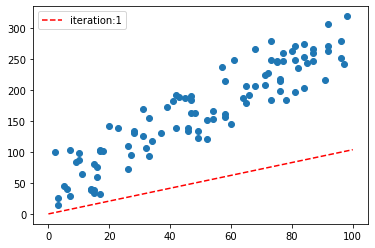

w: 1.7092559390121798, b:0.027971241094313388, loss:3523.8059266021028
w: 2.146955471165573, b:0.03554552941709298, loss:1731.5272718681174
w: 2.45269774110321, b:0.04197167006316206, loss:1659.5993103517737
w: 2.6459337318657195, b:0.04617095669529113, loss:1209.536832975101


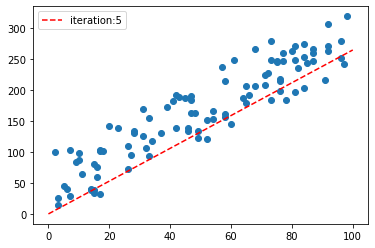

w: 2.7980697887222017, b:0.049376355170776445, loss:717.2294821019984
w: 2.879901813809048, b:0.05093231699389629, loss:454.55241617251556
w: 2.883308093548537, b:0.0525663832601436, loss:779.9369708993638
w: 2.98987655133316, b:0.05584788689562433, loss:1097.2898832047727


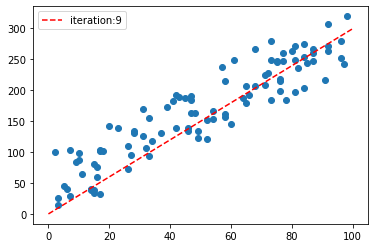

w: 3.000956408036147, b:0.05692882046823538, loss:615.6053497814617
w: 3.000884537926595, b:0.058514460386288644, loss:816.8093627977644
w: 3.0711916451459786, b:0.06061659982436665, loss:679.7266162537475
w: 3.0917883682207146, b:0.062450501785598675, loss:759.8113322475613


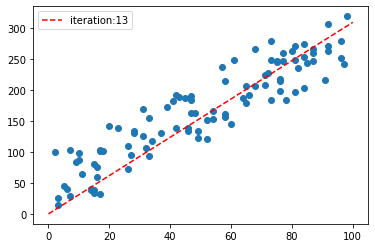

w: 3.106661996114464, b:0.0631537437662276, loss:558.1121861718594
w: 3.1626742606350153, b:0.06610899030641626, loss:1233.9575791887514
w: 3.141341457942108, b:0.0668787216117298, loss:615.8479813134793
w: 3.1411937180361824, b:0.06778247208521339, loss:473.80083830801846


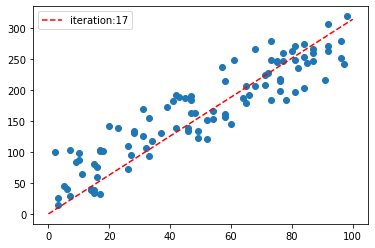

w: 3.119414900319679, b:0.06862543488083428, loss:645.8634784216565
w: 3.1346306244375266, b:0.07006129912813064, loss:721.7106019712098
w: 3.0993792316582383, b:0.07058914637290212, loss:525.4319164249162
w: 3.0981472691834515, b:0.07170090310438286, loss:720.9459164865827


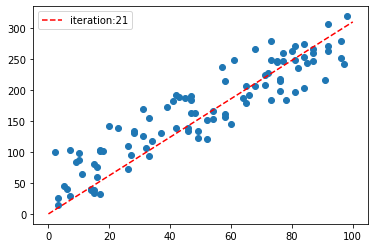

w: 3.12321235287075, b:0.0738801300460146, loss:943.1136581459525
w: 3.0650809100241525, b:0.07359907367367048, loss:404.17059084392565
w: 3.023936043283275, b:0.07380085009826295, loss:446.9841263032201
w: 3.0510064682524094, b:0.07472780865298442, loss:438.38233024347585


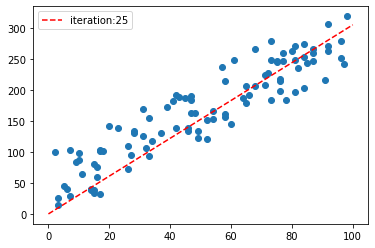

w: 3.0830376704196145, b:0.0762277255216364, loss:567.9506168375664
w: 3.0680434556375435, b:0.07742706373722706, loss:876.3465478168833
w: 3.1024594423891467, b:0.07863090229504606, loss:531.0995150179011
w: 3.1593349359239995, b:0.08044559143715575, loss:708.9174739260217


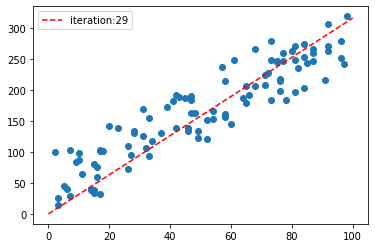

w: 3.164616198063071, b:0.0820044133330479, loss:774.8377975956658
w: 3.194246474505053, b:0.08378997026661077, loss:753.7556237844788
w: 3.157554997589404, b:0.08428870583027659, loss:779.2463192024105
w: 3.162998842723026, b:0.08538200717715314, loss:502.6382879821866


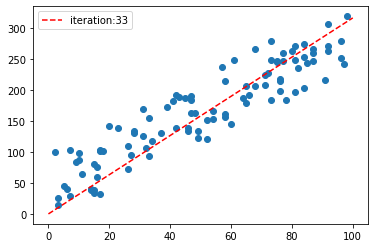

w: 3.142181410074585, b:0.08641523142518764, loss:717.0449803948543
w: 3.1451993490340517, b:0.08826258456302395, loss:966.4410336267282
w: 3.1427023490923323, b:0.08936147950579146, loss:543.8186075730173
w: 3.0957230341878463, b:0.0895043669062633, loss:668.3372059350604


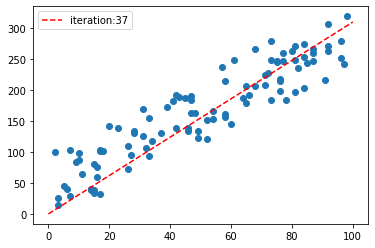

w: 3.0719631456042924, b:0.09030377970779753, loss:661.9284365418786
w: 3.0742589337237636, b:0.09075797445304365, loss:501.13843565315324
w: 3.0611691987137024, b:0.09132905604174368, loss:490.2486275173538


In [209]:
w, b = train(x_list, y_list, 32, 0.0001, 40)
x_dot = np.linspace(0, 100, 50)
y_dot = w * x_dot + b
# plt.scatter(x_list, y_list)
# plt.plot(x_dot, y_dot)
# batch_ids = np.random.choice(100, 80)
# print(batch_ids.dtype)
# print('xlist', x_list, len(x_list), type(x_list))
# print(x_list[batch_ids])
# np.choose(batch_ids, x_list)
# batch_y = np.choose(batch_ids, gt_y_list)